In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio
import scipy.optimize as optimize

from sklearn import svm # SVM software

In [5]:
# visualizing the dataset

mat = scio.loadmat('data/ex6data1.mat')
X, Y = mat['X'], mat['y']

# divide pos / neg
pos = np.array([X[i] for i in range(X.shape[0]) if Y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if Y[i] == 0])

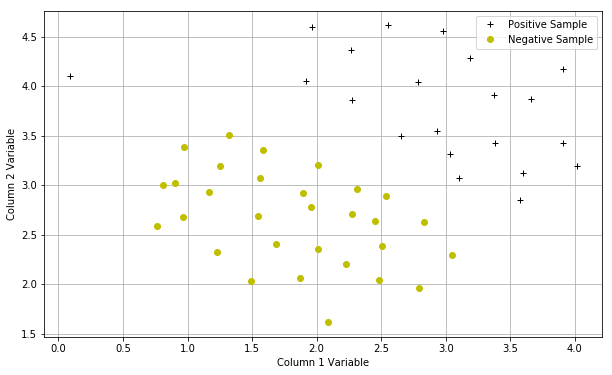

In [6]:
# plot data
def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,0],pos[:,1],'k+',label='Positive Sample')
    plt.plot(neg[:,0],neg[:,1],'yo',label='Negative Sample')
    plt.xlabel('Column 1 Variable')
    plt.ylabel('Column 2 Variable')
    plt.legend()
    plt.grid(True)
    
plotData()

In [13]:
# function to draw the SVM boundary
def plotBoundary(my_svm, x_min, x_max, y_min, y_max):
    """
    function to plot the decision boundary for a trained SVM
    
    it works by making a grid of x1 ('xvals') and x2 ('yvals') points,
    and for each, computing whether the SVM classifies that point as True or False
    
    Then, a contour is drawn with a built-in pyplot function
    """
    xvals = np.linspace(x_min, x_max, 100) # return list
    yvals = np.linspace(y_min, y_max, 100)
    zvals = np.zeros((len(xvals), len(yvals)))
    
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            # 用训练好的分类器去预测数据
            zvals[i][j] = float(my_svm.predict(np.array( [[xvals[i], yvals[j]]] )))
    zvals = np.transpose(zvals)
    
    u, v = np.meshgrid(xvals, yvals)
    mycontour = plt.contour(xvals, yvals, zvals)
    
    plt.title('Decision Boundary')
    

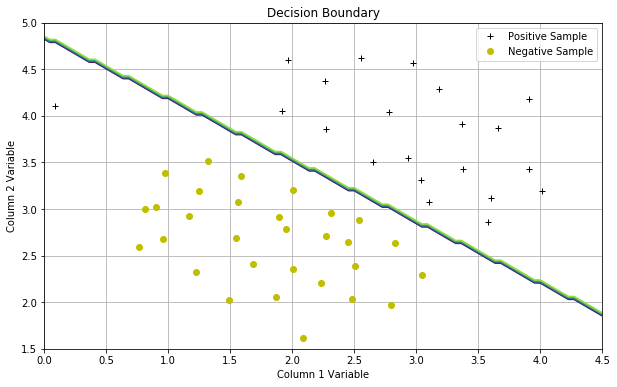

In [15]:
# run the SVM training (with C=1) using SVM software
# where C=1, you should find that the SVM puts the decision boundary
# in the gap between the two datasets and misclassifies the data point on the far left

# first we make an instance of an SVM with C=1 and 'linear' kernel
linear_svm = svm.SVC(C=1, kernel='linear')

# now, fit the SVM to our X matrix (no bias unit)
linear_svm.fit(X, Y.flatten()) # 用训练数据拟合分类器模型

# now plot the decision boundary
plotData()
plotBoundary(linear_svm, 0, 4.5, 1.5, 5)



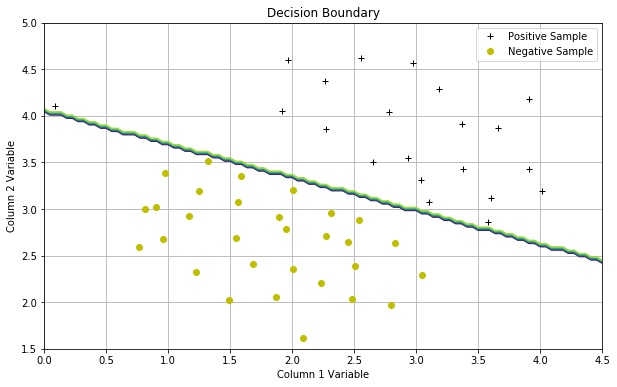

In [16]:
# When C = 100, you should find that the SVM now classifies every 
# single example correctly, but has a decision boundary that does 
# not appear to be a natural fit for the data.
linear_svm = svm.SVC(C=100, kernel='linear')
linear_svm.fit(X, Y.flatten())
plotData()
plotBoundary(linear_svm,0,4.5,1.5,5)


In [21]:
# svm with gaussian kernels (custom kernel)

def gaussKernel(x1, x2, sigma):
    sigma_squared = np.power(sigma, 2) # sigma的二次方 => sigma^2
    return np.exp(-(x1-x2).T.dot(x1-x2) / (2*sigma_squared))

# x1 = [1 2 1]; x2 = [0 4 -1]; sigma = 2;
# this value should be about 0.324652
print (gaussKernel(np.array([1,2,1]), np.array([0,4,-1]), 2))

0.32465246735834974


In [22]:
# Now that I've shown I can implement a gaussian Kernel,
# I will use the of-course built-in gaussian kernel in my SVM software
# because it's certainly more optimized than mine.
# It is called 'rbf' and instead of dividing by sigmasquared,
# it multiplies by 'gamma'. As long as I set gamma = sigma^(-2),
# it will work just the same.

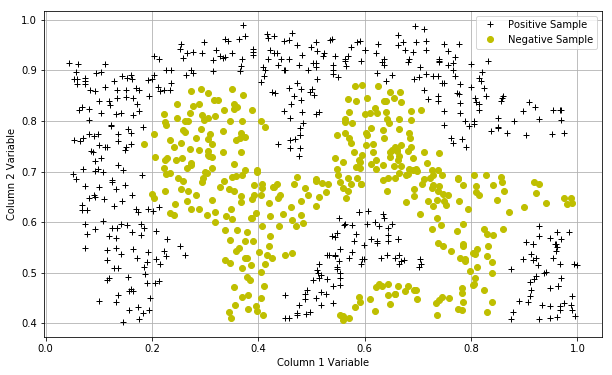

In [24]:
mat2 = scio.loadmat('data/ex6data2.mat')

X, Y = mat2['X'], mat2['y']

#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if Y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if Y[i] == 0])

plotData()

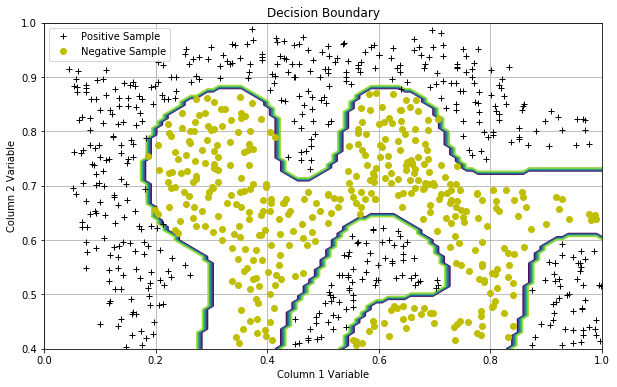

In [27]:
# train the SVM with the Gaussian kernel on this dataset

# variables
sigma = 0.1
gamma = np.power(sigma, -2.)
# rbf => gaussian kernel, gamma = sigma^(-2)（这这里相当于一个入参）
gaus_svm = svm.SVC(C=1, kernel='rbf', gamma=gamma) 
gaus_svm.fit(X, Y.flatten())
plotData()
plotBoundary(gaus_svm, 0, 1, .4, 1.0)

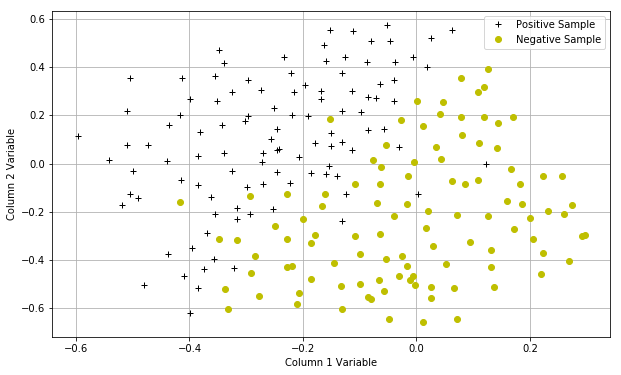

In [31]:
mat3 = scio.loadmat('data/ex6data3.mat')

#Training set
X, Y = mat3['X'], mat3['y']
Xval, Yval = mat3['Xval'], mat3['yval']

#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if Y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if Y[i] == 0])

plotData()


In [34]:
# Your task is to use cross validation set Xval, Yval to
# determin the best C and σ parameter to use.

# The score() function for a trained SVM 
# takes in X and Y to test the score on, 
# and the (float) value returned is "Mean accuracy of self.predict(X)"

C_tuple = (0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.)
sigma_values = C_tuple
best_pair, best_score = (0, 0), 0

for C in C_tuple:
    for sigma in sigma_values:
        gamma = np.power(sigma, -2.)
        gaus_svm = svm.SVC(C=C, kernel='rbf', gamma=gamma)
        gaus_svm.fit(X, Y.flatten())
        this_score = gaus_svm.score(Xval, Yval)
        
        # print this_score
        if this_score > best_score:
            best_score = this_score
            best_pair = (C, gamma)

print ("Best C, sigma pair is (%f, %f) with a score of %f."%(best_pair[0], best_pair[1], best_score))


Best C, sigma pair is (0.300000, 100.000000) with a score of 0.965000.


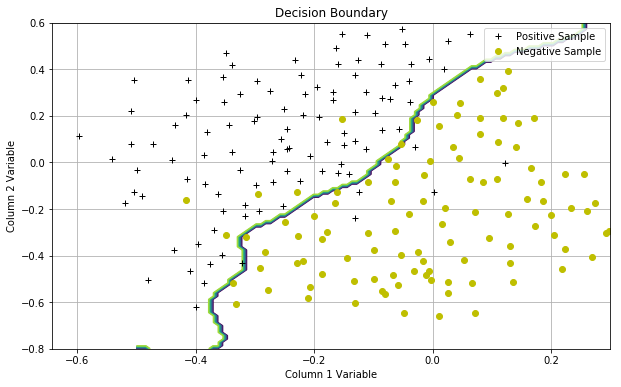

In [35]:
# apply the best pair (C, sigma)
gaus_svm = svm.SVC(C=best_pair[0], kernel='rbf', gamma=best_pair[1])
gaus_svm.fit(X, Y.flatten())

plotData()
plotBoundary(gaus_svm,-.5,.3,-.8,.6)


In [18]:
a = np.power(3,4)
print (a)

81
